In [5]:
import os.path as op
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import nibabel as nib
import ants
import skimage.filters as skf

Multiclass Otsu thresholds: [ 66.13086 171.40039 306.36133]
Using first class threshold: 66.130859375


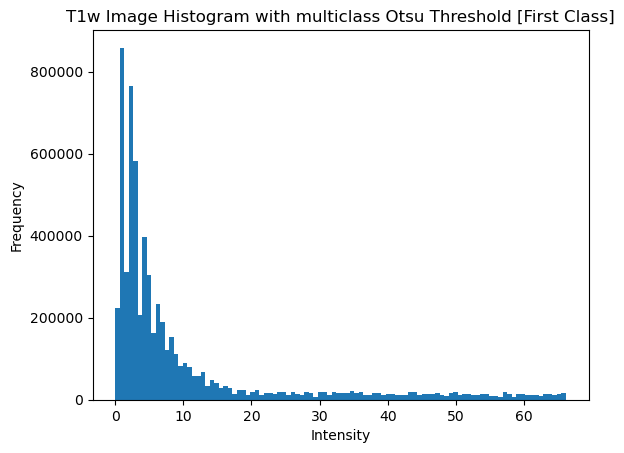

In [42]:
t1_path = op.join("/Users/jmt/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Projects/NoiseMap/T1w_MPRAGE.nii.gz")
t1_ai = ants.image_read(t1_path)
t1_img = t1_ai.numpy()
t1_sample = t1_img[t1_img > 0].flatten()

# Multilevel Otsu thresholds
otsu_thresh = skf.threshold_multiotsu(t1_sample, classes=4)
print(f"Multiclass Otsu thresholds: {otsu_thresh}")
thresh = otsu_thresh[0]
print(f"Using first class threshold: {thresh}")

# Signal histogram
n, bins, patches = plt.hist(t1_sample, bins=100, range=(0, thresh))

# Bin centers from edges
x = 0.5 * (bins[1:] + bins[:-1])

plt.title("T1w Image Histogram with multiclass Otsu Threshold [First Class]")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

Iteration 1: sigma_est = 3.3982, new threshold = 16.9910
Iteration 2: sigma_est = 2.5480, new threshold = 12.7398
Iteration 3: sigma_est = 2.5480, new threshold = 12.7398
Iteration 4: sigma_est = 2.5480, new threshold = 12.7398
Iteration 5: sigma_est = 2.5480, new threshold = 12.7398


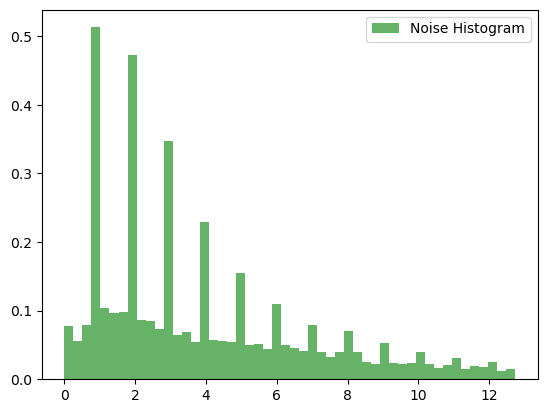

In [47]:
# Estimate noise sigma from median of background magnetiude signal, adjusted for Rayleigh distribution
# Iterate on threshold, using the Rayleight estimate of sigma from the previous iteration times 5 as the new threshold

new_thresh = thresh

for i in range(5):
    noise_sample = t1_sample[t1_sample < new_thresh]
    median_bg = np.median(noise_sample)
    sigma_est = median_bg / np.sqrt(np.log(4))
    new_thresh = sigma_est * 5
    print(f"Iteration {i+1}: sigma_est = {sigma_est:.4f}, new threshold = {new_thresh:.4f}")

# Plot histogram and Rayleigh PDF
plt.hist(noise_sample, bins=50, density=True, alpha=0.6, color='g', label='Noise Histogram')
plt.legend()
plt.show()